In [1]:
import scipy as sp
import numpy as np
from numpy.polynomial import legendre
import pandas as pd
import matplotlib.pyplot as plt
from iminuit import Minuit


In [2]:
import os
import glob
files = os.listdir('./')
# for file in glob.glob("*.pkl"):
#     print(file)

In [3]:
# Importing panda dataframe here

pd.set_option('max_columns', None);

J_psi = pd.read_pickle("./Jpsi.pkl");
psi2S = pd.read_pickle("./psi2S.pkl");
jpsi_mu_k_swap = pd.read_pickle("./jpsi_mu_k_swap.pkl")
jpsi_mu_pi_swap = pd.read_pickle("./jpsi_mu_pi_swap.pkl")
phimumu = pd.read_pickle("./phimumu.pkl")
comb = pd.read_pickle("./comb.pkl")
flat_acceptance = pd.read_pickle("./acceptance_mc.pkl");
k_pi_swap = pd.read_pickle("./k_pi_swap.pkl")
pKmumu_piTok_kTop = pd.read_pickle("./pKmumu_piTok_kTop.pkl")
pKmumu_piTop = pd.read_pickle("./pKmumu_piTop.pkl")
sig = pd.read_pickle("./sig.pkl");


In [21]:
sim = flat_acceptance;
# sim = sig;
# sim.head()


print(sim.shape)
q2_min_range = 0
q2_max_range = 2

sim = sim[(sim['q2'] >= q2_min_range) & (sim['q2'] <= q2_max_range)]
# sim = sim[(sim['q2'] >= 14.18) & (sim['q2'] <= 19)]
# np.count_nonzero(a)
print(sim.shape)

# sim = sig;
# The main investigation is signal file -> Can be changed to fit other file

(925779, 80)
(84770, 80)


(84770, 80)
This is for signal acceptance!

Fitted Legendre polynomial is for costhetal:  0.4999029864047754 - 7.508645929044829e-05 P_1(x) -
0.26065909589421643 P_2(x) + 0.0025132511533583306 P_3(x) -
0.0896961701658055 P_4(x)

Fitted Legendre polynomial is for costhetak:  0.49994981887173445 - 0.10754869176668001 P_1(x) -
0.12846408500718498 P_2(x) - 0.041396924699508245 P_3(x) -
0.04674463679479162 P_4(x)

Fitted Legendre polynomial is for phi:  0.15890177949830234 + 0.000501130232885136 P_1(x) -
0.0015196630236345005 P_2(x) - 9.701247424296178e-05 P_3(x) +
0.00019144400409270334 P_4(x) + 2.3801719229761946e-06 P_5(x) -
4.3397233512374875e-06 P_6(x)

Fitted Legendre polynomial is for q2:  -2.5564565425101193 + 7.2009937665859995 P_1(x) -
7.220593000101544 P_2(x) + 4.436801239858182 P_3(x) -
1.6586589327183965 P_4(x) + 0.33759312139544545 P_5(x) -
0.028229928847137792 P_6(x)


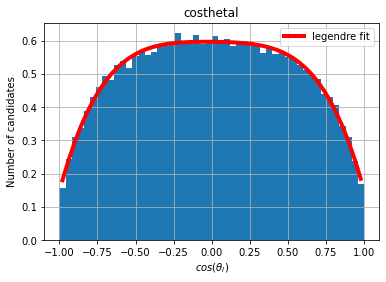

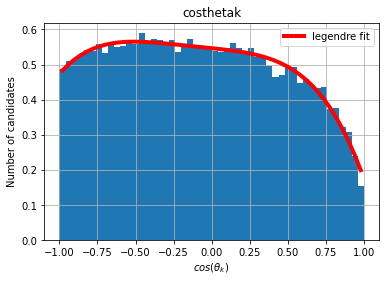

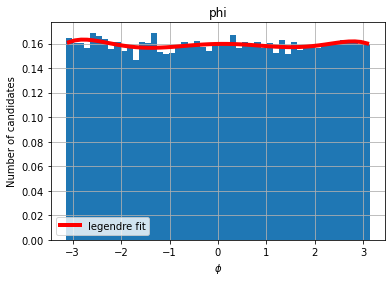

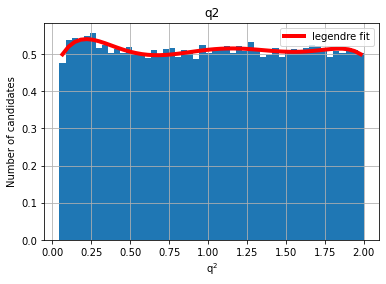

In [22]:
# Investigate signal (sig) first

print(sim.shape);

print('This is for signal acceptance!')

# ctl = costhetal; ctk = costhetak; phi = phi

bins_number_plot = 50;
# PLotting costhetal
plt.figure(1)
sim_ctl = plt.hist(sim['costhetal'], bins=bins_number_plot, density=True) #Finding cos theta l

# ctl_Jsi will return y-values as first argument, x-bins as 2nd argument
sim_ctl_freq = sim_ctl[0] #Frequency of each bin, use for fitting
sim_ctl_x_side = sim_ctl[1]
sim_ctl_x_cent = np.diff(sim_ctl_x_side)/2 + np.delete(sim_ctl_x_side, -1) # Centre of each bin

# Fitting legendre's polynomial
sim_ctl_leg_fit, [residuals, rank, singular_values, rcond] = np.polynomial.legendre.legfit(sim_ctl_x_cent, sim_ctl_freq, 4, full=True)
sim_ctl_freq_leg = np.polynomial.legendre.legval(sim_ctl_x_cent, np.array(sim_ctl_leg_fit))

plt.title('costhetal')
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.plot(sim_ctl_x_cent, sim_ctl_freq_leg, color='red', linestyle='solid', linewidth=4, markersize=12)
plt.grid()
plt.legend(['legendre fit'])
print('')
print('Fitted Legendre polynomial is for costhetal: ', np.polynomial.legendre.Legendre(sim_ctl_leg_fit))



# PLotting costhetak
plt.figure(2)
sim_ctk = plt.hist(sim['costhetak'], bins=bins_number_plot, density=True) #Finding cos theta l

# ctl_Jsi will return y-values as first argument, x-bins as 2nd argument
sim_ctk_freq = sim_ctk[0] #Frequency of each bin, use for fitting
sim_ctk_x_side = sim_ctk[1]
sim_ctk_x_cent = np.diff(sim_ctk_x_side)/2 + np.delete(sim_ctk_x_side, -1) # Centre of each bin
# Fitting legendre's polynomial
sim_ctk_leg_fit, [residuals, rank, singular_values, rcond] = np.polynomial.legendre.legfit(sim_ctk_x_cent, sim_ctk_freq, 4, full=True)
sim_ctk_freq_leg = np.polynomial.legendre.legval(sim_ctk_x_cent, np.array(sim_ctk_leg_fit))

plt.xlabel(r'$cos(\theta_k)$')
plt.title('costhetak')
plt.ylabel(r'Number of candidates')
plt.plot(sim_ctk_x_cent, sim_ctk_freq_leg, color='red', linestyle='solid', linewidth=4, markersize=12)
plt.grid()
plt.legend(['legendre fit'])
print('')
print('Fitted Legendre polynomial is for costhetak: ', np.polynomial.legendre.Legendre(sim_ctk_leg_fit))



#PLotting phi
plt.figure(3)
sim_phi = plt.hist(sim['phi'], bins=bins_number_plot, density=True) #Finding cos theta l

# ctl_Jsi will return y-values as first argument, x-bins as 2nd argument
sim_phi_freq = sim_phi[0] #Frequency of each bin, use for fitting
sim_phi_x_side = sim_phi[1]
sim_phi_x_cent = np.diff(sim_phi_x_side)/2 + np.delete(sim_phi_x_side, -1) # Centre of each bin
# Fitting legendre's polynomial
leg_fit_sim_phi, [residuals, rank, singular_values, rcond] = np.polynomial.legendre.legfit(sim_phi_x_cent, sim_phi_freq, 6, full=True)
sim_phi_freq_leg = np.polynomial.legendre.legval(sim_phi_x_cent, np.array(leg_fit_sim_phi))

plt.title('phi')
plt.xlabel(r'$\phi$')
plt.ylabel(r'Number of candidates')
plt.plot(sim_phi_x_cent, sim_phi_freq_leg, color='red', linestyle='solid', linewidth=4, markersize=12)
plt.grid()
plt.legend(['legendre fit'])
print('')
print('Fitted Legendre polynomial is for phi: ', np.polynomial.legendre.Legendre(leg_fit_sim_phi))



# PLotting q2
plt.figure(4)
sim_q2_dataset = sim['q2']

sim_min_q2 = np.min(sim_q2_dataset)
sim_max_q2 = np.max(sim_q2_dataset)

sim_q2_shift = (sim_min_q2+sim_max_q2)/2
sim_q2_diff = (sim_max_q2-sim_min_q2)/2
sim_q2_dataset = (sim_q2_dataset-sim_q2_shift)/sim_q2_diff
# q2_Jsi = plt.hist((J_psi['q2']-shift_q2_Jsi)/diff_q2_Jsi, bins=10, density=True) #Finding cos theta l
sim_q2 = plt.hist(sim['q2'], bins=bins_number_plot, density=True) #Finding cos theta l



# ctl_Jsi will return y-values as first argument, x-bins as 2nd argument
sim_q2_freq = sim_q2[0] #Frequency of each bin, use for fitting
sim_q2_x_side = sim_q2[1]
sim_q2_x_cent = np.diff(sim_q2_x_side)/2 + np.delete(sim_q2_x_side, -1) # Centre of each bin
# Fitting legendre's polynomial
sim_q2_leg_fit, [residuals, rank, singular_values, rcond] = np.polynomial.legendre.legfit(sim_q2_x_cent, sim_q2_freq, 6, full=True)
sim_q2_freq_leg = np.polynomial.legendre.legval(sim_q2_x_cent, np.array(sim_q2_leg_fit))


plt.title('q2')
plt.xlabel(r'q$^{2}$')
plt.ylabel(r'Number of candidates')
plt.plot(sim_q2_x_cent, sim_q2_freq_leg, color='red', linestyle='solid', linewidth=4, markersize=12)
plt.grid()
plt.legend(['legendre fit'])
print('')
print('Fitted Legendre polynomial is for q2: ', np.polynomial.legendre.Legendre(sim_q2_leg_fit))

plt.show()

In [6]:
# Flat acceptance

# print(flat_acceptance.shape);
# flat_acceptance.head()

# # col_Name_Array = Investigate.columns;
# # for i in range(col_Name_Array.size):
# # #     print(i)
# #     print(col_Name_Array[i])

# col_Name_Array = Investigate.columns;
# for i in range(col_Name_Array.size):
# #     print(i)
# #     print(col_Name_Array[i])
#     plt.figure(i);
#     plt.hist(Investigate[col_Name_Array[i]], bins=50)
#     plt.title(col_Name_Array[i])
#     plt.grid()
#     plt.show()